# Problem Description

![Bank Marketing Campaign](https://github.com/filipecorreia23/Bank-Term-Deposit-Prediction/blob/main/bankmarketingcampaign.jpeg?raw=true)

**How do you turn a "maybe" into a "yes"?**

For banks, this is the key to running successful marketing campaigns. Phone calls are a powerful tool for offering financial products like term deposits, but they come with challenges. Contacting uninterested clients wastes time, resources, and trust. Missing the right clients means losing valuable opportunities. So, how can banks know who to call?

This project focuses on **predicting whether a client will subscribe to a term deposit ("yes" or "no")**, based on past marketing campaigns conducted by a Portuguese bank. The dataset includes rich information about clients, such as their demographics, previous interactions, and economic conditions. By analyzing this data, we can uncover the patterns behind client decisions.

However, the problem isn’t as simple as it seems. The dataset is **imbalanced**, meaning most clients say "no," and client profiles are highly **diverse**, making accurate predictions tricky. For example, a younger client might respond differently to a call than a retiree, and these differences can complicate modeling. Overcoming these hurdles requires careful feature engineering and robust machine learning techniques.

The rewards, however, are worth it. Solving this problem can help banks run **smarter, more personalized campaigns**, saving money, improving efficiency, and delivering a better experience for clients. Beyond banking, these insights can inspire other industries—like e-commerce or healthcare—to adopt data-driven approaches for better decision-making. 

**The question remains:** *Can we uncover the "yes" that makes the difference?*


# Dataset Description

The dataset provides detailed information about clients and their interactions with a Portuguese banking institution’s marketing campaigns. The goal is to predict whether a client will subscribe to a term deposit (**"yes" or "no"**). This data includes a variety of features, ranging from demographic details to historical campaign outcomes, as well as economic indicators.

---

### **Columns Description**

#### **Baseline Data**
1. **`age`** – Age of the client (numeric).  
2. **`job`** – Type of job (categorical):  
   - Values: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services".  
3. **`marital`** – Marital status (categorical):  
   - Values: "married", "divorced" (includes widowed), "single".  
4. **`education`** – Education level (categorical):  
   - Values: "unknown", "secondary", "primary", "tertiary".  
5. **`default`** – Has credit in default? (binary):  
   - Values: "yes", "no".  
6. **`balance`** – Average yearly balance, in euros (numeric).  
7. **`housing`** – Has a housing loan? (binary):  
   - Values: "yes", "no".  
8. **`loan`** – Has a personal loan? (binary):  
   - Values: "yes", "no".  

#### **Campaign Data**
9. **`contact`** – Contact communication type (categorical):  
   - Values: "unknown", "telephone", "cellular".  
10. **`day`** – Last contact day of the month (numeric).  
11. **`month`** – Last contact month of the year (categorical):  
   - Values: "jan", "feb", "mar", ..., "nov", "dec".  
12. **`duration`** – Last contact duration, in seconds (numeric).  
   - **Important Note:** Duration is a highly predictive feature for the target variable but may introduce bias if used without caution.

#### **Previous Campaign Data**
13. **`campaign`** – Number of contacts performed during this campaign (numeric, includes last contact).  
14. **`pdays`** – Number of days since the client was last contacted from a previous campaign (numeric; `-1` indicates no prior contact).  
15. **`previous`** – Number of contacts performed before this campaign for this client (numeric).  
16. **`poutcome`** – Outcome of the previous marketing campaign (categorical):  
   - Values: "unknown", "other", "failure", "success".  

#### **Target Variable**
17. **`y`** – Did the client subscribe to a term deposit? (binary):  
   - Values: "yes", "no".  

---

### **Dataset Characteristics**
- **Type**: Multivariate  
- **Subject Area**: Business, Marketing  
- **Associated Task**: Classification  
- **Feature Types**: Categorical, Numeric  
- **Instances**: 45,211  
- **Features**: 16  

---

### **Challenges**
1. **Class Imbalance**:  
   - Most clients do not subscribe to term deposits (`"no"`), making this a highly imbalanced dataset. Handling this imbalance is key to building accurate and fair models.
2. **Feature Interactions**:  
   - Numerical features (e.g., `balance`, `duration`) and categorical features (e.g., `job`, `contact`) interact in complex ways, requiring thoughtful feature engineering.  
3. **Bias in Predictive Features**:  
   - Features like `duration` are strong predictors but can introduce bias if interpreted improperly. Models need to consider their practical relevance.

---

### **Potential Applications**
1. **Smarter Marketing Strategies**:  
   - Improve campaign targeting by identifying clients most likely to subscribe, saving resources and time.
2. **Customer Insights**:  
   - Analyze demographic and behavioral factors influencing client decisions.
3. **Cross-Industry Impact**:  
   - Insights from this dataset can also apply to industries like e-commerce and telecom, where customer retention and product adoption are key.

# Dependencies loading

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Utilities
import os
import warnings
warnings.filterwarnings('ignore')

# Project setup

In [9]:
bank_full_url = 'https://raw.githubusercontent.com/filipecorreia23/Bank-Term-Deposit-Prediction/main/input/bank-full.csv'

# Data preparation

## Data loading

In [12]:
data = pd.read_csv(bank_full_url, sep=';')
df = data.copy()

In [13]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14350,47,admin.,single,secondary,no,-331,yes,no,cellular,14,jul,227,4,-1,0,unknown,no
25879,59,retired,married,primary,no,741,no,no,cellular,19,nov,194,2,152,2,failure,no
42174,32,management,single,tertiary,no,935,no,no,cellular,9,nov,165,1,91,7,success,yes
24824,54,technician,married,secondary,no,13,yes,no,cellular,18,nov,145,2,-1,0,unknown,no
27415,30,admin.,single,secondary,no,294,yes,yes,cellular,21,nov,527,1,-1,0,unknown,no
21225,32,technician,single,secondary,no,0,no,no,cellular,18,aug,594,4,-1,0,unknown,yes
17060,30,management,single,tertiary,no,2,yes,yes,cellular,25,jul,1031,8,-1,0,unknown,yes
15752,26,management,single,secondary,no,609,yes,no,cellular,21,jul,594,1,-1,0,unknown,no
43079,22,student,single,unknown,no,1215,no,no,cellular,19,feb,145,3,192,1,failure,yes
21164,30,management,single,tertiary,no,409,yes,no,cellular,14,aug,120,4,-1,0,unknown,no


# Dataset adjustment

## Removing Redundant Variables

The `day` and `month` columns are combined into a single variable, `contact_date`, to simplify the dataset and capture temporal information more effectively. This helps reduce redundancy without losing any meaningful data.


In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [17]:
# Combine 'day' and 'month' into a string
df['contact_date'] = df['day'].astype(str) + '-' + df['month']

# Drop the original 'day' and 'month' columns
df = df.drop(columns=['day', 'month'])

df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,contact_date
19773,34,technician,single,secondary,no,161,no,yes,cellular,61,2,-1,0,unknown,no,8-aug
42714,74,retired,married,tertiary,no,2575,no,no,cellular,172,2,161,1,failure,no,25-jan
564,59,services,divorced,secondary,no,0,yes,yes,unknown,97,1,-1,0,unknown,no,6-may
1810,55,blue-collar,married,primary,no,1373,no,no,unknown,1087,2,-1,0,unknown,no,9-may
32765,33,management,married,tertiary,no,3669,yes,no,cellular,370,1,-1,0,unknown,no,17-apr
845,33,blue-collar,married,primary,no,716,yes,no,unknown,83,3,-1,0,unknown,no,7-may
34404,34,unemployed,married,secondary,no,156,yes,no,cellular,136,5,-1,0,unknown,no,5-may
8199,34,services,single,secondary,no,-96,yes,no,unknown,269,3,-1,0,unknown,no,2-jun
13377,38,blue-collar,married,secondary,no,121,yes,yes,cellular,80,2,-1,0,unknown,no,9-jul
24939,44,management,married,tertiary,no,318,no,no,cellular,638,2,-1,0,unknown,no,18-nov


## Handling 'Unknown' values

In dataset adjustment, it's important to find any missing values, including placeholders like `"unknown"`. This helps decide whether to fill them, remove them, or leave them as they are before moving on to further analysis.


In [19]:
unknown_counts = df.apply(lambda x: (x == 'unknown').sum())
total_counts = df.shape[0]
unknown_percentage = (unknown_counts / total_counts) * 100

print("Count of 'unknown' values per column:")
print(unknown_counts)

Count of 'unknown' values per column:
age                 0
job               288
marital             0
education        1857
default             0
balance             0
housing             0
loan                0
contact         13020
duration            0
campaign            0
pdays               0
previous            0
poutcome        36959
y                   0
contact_date        0
dtype: int64


In [20]:
print("Percentage of 'unknown' values per column:")
print(unknown_percentage)

Percentage of 'unknown' values per column:
age              0.000000
job              0.637013
marital          0.000000
education        4.107407
default          0.000000
balance          0.000000
housing          0.000000
loan             0.000000
contact         28.798301
duration         0.000000
campaign         0.000000
pdays            0.000000
previous         0.000000
poutcome        81.747805
y                0.000000
contact_date     0.000000
dtype: float64


In [23]:
df.shape

(45211, 16)

In [24]:
print("Value counts for 'contact':")
df.contact.value_counts()

Value counts for 'contact':


contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [25]:
print("Value counts for 'poutcome':")
df.poutcome.value_counts()

Value counts for 'poutcome':


poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

**Removing 'unknown' values**: We will drop rows where important columns like `education` and `job` have the value `'unknown'` to keep the data clean and reliable.


In [27]:
#drop the unknown values in education and job
df = df[df['education'] != 'unknown']
df = df[df['job'] != 'unknown']

**Handling 'unknown' values in `poutcome`**: The majority of values in the `poutcome` column are labeled as `'unknown'`, outnumbering all other categories. To simplify and retain this data, we are replacing `'unknown'` with `'other'`.

In [29]:
# Replace the 'unknown' values in the 'poutcome' column with 'other'
df['poutcome'] = df['poutcome'].replace('unknown', 'other')

# Check the updated value counts in 'poutcome'
print(df['poutcome'].value_counts())

poutcome
other      37060
failure     4709
success     1424
Name: count, dtype: int64


In [30]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,contact_date
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,other,no,5-may
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,other,no,5-may
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,other,no,5-may
5,35,management,married,tertiary,no,231,yes,no,unknown,139,1,-1,0,other,no,5-may
6,28,management,single,tertiary,no,447,yes,yes,unknown,217,1,-1,0,other,no,5-may
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,380,1,-1,0,other,no,5-may
8,58,retired,married,primary,no,121,yes,no,unknown,50,1,-1,0,other,no,5-may
9,43,technician,single,secondary,no,593,yes,no,unknown,55,1,-1,0,other,no,5-may
10,41,admin.,divorced,secondary,no,270,yes,no,unknown,222,1,-1,0,other,no,5-may
11,29,admin.,single,secondary,no,390,yes,no,unknown,137,1,-1,0,other,no,5-may


In [33]:
df.shape

(43193, 16)

**Keeping 'unknown' values in `contact`:** For now, we will keep the `'unknown'` values in the `contact` column as a separate category.

## Converting Target Variable (`y`)

We are converting the `y` column (target variable) to numerical values: `1` for "yes" and `0` for "no". This ensures compatibility with machine learning algorithms, simplifies evaluation metrics, and makes exploratory data analysis (EDA) more straightforward. By doing this early, we streamline the workflow for subsequent steps like visualization, splitting, and modeling.


In [47]:
# Convert the target variable 'y' to binary 0 and 1
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

df['y'].value_counts()

y
0    38172
1     5021
Name: count, dtype: int64

## Handling Binary Variables (`yes`/`no`)

We are transforming binary features (`yes`/`no`) into numeric values (`1` for `yes` and `0` for `no`) to ensure compatibility across different machine learning models. Here's how the different boosting algorithms handle categorical variables:

- **LightGBM:** Supports categorical variables natively, but transforming binary features is still useful for simplicity and consistency.
- **CatBoost:** Handles categorical variables natively, but binary features are simple to convert and are often treated as numeric.
- **XGBoost:** Requires all features to be numeric, making transformation mandatory.
- **Gradient Boosting (Scikit-Learn):** Does not handle categorical variables, requiring all features to be numeric.

By converting these binary variables now, we prepare the dataset for compatibility with all algorithms, ensuring clarity and flexibility for future analysis and modeling steps.

In [50]:
binary_columns = ['default', 'housing', 'loan']

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,contact_date
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,-1,0,other,0,5-may
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,-1,0,other,0,5-may
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,-1,0,other,0,5-may
5,35,management,married,tertiary,0,231,1,0,unknown,139,1,-1,0,other,0,5-may
6,28,management,single,tertiary,0,447,1,1,unknown,217,1,-1,0,other,0,5-may
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,380,1,-1,0,other,0,5-may
8,58,retired,married,primary,0,121,1,0,unknown,50,1,-1,0,other,0,5-may
9,43,technician,single,secondary,0,593,1,0,unknown,55,1,-1,0,other,0,5-may
10,41,admin.,divorced,secondary,0,270,1,0,unknown,222,1,-1,0,other,0,5-may
11,29,admin.,single,secondary,0,390,1,0,unknown,137,1,-1,0,other,0,5-may


For the other categorical features, we chose to retain them as they are for now, planning to handle them natively in models that support it and numerically for XGBoost and the baseline model.

## Sorting values
We sort the dataset by age and balance to make the data easier to understand and ensure it's organized for analysis.

In [54]:
df.sort_values(by=['age', 'balance'], inplace=True)
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,contact_date
41252,18,student,single,secondary,0,5,0,0,cellular,143,2,-1,0,other,0,24-aug
42146,18,student,single,secondary,0,156,0,0,cellular,298,2,82,4,other,0,4-nov
40887,18,student,single,primary,0,608,0,0,cellular,267,1,-1,0,other,1,12-aug
42274,18,student,single,primary,0,608,0,0,cellular,210,1,93,1,success,1,13-nov
40736,18,student,single,primary,0,1944,0,0,telephone,122,3,-1,0,other,0,10-aug
34288,19,student,single,primary,0,0,0,0,cellular,72,4,-1,0,other,0,4-may
41402,19,student,single,secondary,0,4,0,0,cellular,114,1,-1,0,other,0,3-sep
41706,19,student,single,secondary,0,55,0,0,telephone,89,2,193,1,other,0,6-oct
40927,19,student,single,primary,0,56,0,0,cellular,246,1,-1,0,other,0,12-aug
41500,19,student,single,secondary,0,88,0,0,cellular,191,1,-1,0,other,0,8-sep


### Reviewing the Data

A final look at the dataset ensures it's clean and ready for splitting and further analysis.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 41252 to 33699
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           43193 non-null  int64 
 1   job           43193 non-null  object
 2   marital       43193 non-null  object
 3   education     43193 non-null  object
 4   default       43193 non-null  int64 
 5   balance       43193 non-null  int64 
 6   housing       43193 non-null  int64 
 7   loan          43193 non-null  int64 
 8   contact       43193 non-null  object
 9   duration      43193 non-null  int64 
 10  campaign      43193 non-null  int64 
 11  pdays         43193 non-null  int64 
 12  previous      43193 non-null  int64 
 13  poutcome      43193 non-null  object
 14  y             43193 non-null  int64 
 15  contact_date  43193 non-null  object
dtypes: int64(10), object(6)
memory usage: 5.6+ MB


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43193.0,40.764082,10.512640,18.0,33.0,39.0,48.0,95.0
default,43193.0,0.018105,0.133332,0.0,0.0,0.0,0.0,1.0
balance,43193.0,1354.027342,3042.103625,-8019.0,71.0,442.0,1412.0,102127.0
housing,43193.0,0.562406,0.496096,0.0,0.0,1.0,1.0,1.0
loan,43193.0,0.164541,0.370770,0.0,0.0,0.0,0.0,1.0
duration,43193.0,258.323409,258.162006,0.0,103.0,180.0,318.0,4918.0
campaign,43193.0,2.758178,3.063987,1.0,1.0,2.0,3.0,58.0
pdays,43193.0,40.404070,100.420624,-1.0,-1.0,-1.0,-1.0,871.0
previous,43193.0,0.584863,2.332672,0.0,0.0,0.0,0.0,275.0
y,43193.0,0.116246,0.320523,0.0,0.0,0.0,0.0,1.0


In [61]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
contact_date    0
dtype: int64

In [63]:
df.shape

(43193, 16)

# Dataset Splitting

We split the dataset into:
- **Training (& Validation) dataset**: 80% of the data.
- **Test dataset**: 20% of the data for final evaluation.

Test dataset will be used only for the final predictions! We assume that during the entire study they do not have access to it and do not study its statistical properties.

In [66]:
X = df.drop('y', axis=1)  # Features
y = df['y']               # Target

**Description:** This separates the dataset into the input features X and the target variable y. The target variable y will be used for predictions, while X includes all other columns.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Description:** The `train_test_split` function splits the dataset into training and test sets:

- **test_size=0.2**: 20% of the data is reserved for testing.
- **random_state=42**: Ensures reproducibility of the split.
- **stratify=y**: Maintains the proportion of target classes in both training and testing datasets, ensuring a balanced representation.

In [72]:
print(X_train.shape, X_test.shape)

(34554, 15) (8639, 15)


In [74]:
print(y_train.shape, y_test.shape)

(34554,) (8639,)


# EDA (Exploratory Data Analysis)

## Initial descriptive analyses of the data

### Viewing the first few rows of the training dataset:

In [79]:
X_train.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,contact_date
39829,55,blue-collar,married,secondary,0,16873,0,0,cellular,78,2,-1,0,other,1-jun
29311,34,technician,married,secondary,0,4,1,0,cellular,105,2,263,1,failure,2-feb
7168,40,admin.,married,secondary,0,451,1,1,unknown,257,1,-1,0,other,29-may
3756,29,services,single,secondary,0,-142,1,0,unknown,140,1,-1,0,other,16-may
24946,51,technician,divorced,secondary,0,131,1,0,cellular,193,1,-1,0,other,18-nov
6598,29,management,married,tertiary,0,314,0,0,unknown,938,2,-1,0,other,28-may
33566,33,blue-collar,married,secondary,0,526,1,0,cellular,198,3,-1,0,other,20-apr
17381,41,housemaid,married,secondary,0,0,1,0,telephone,41,2,-1,0,other,28-jul
35849,46,technician,divorced,secondary,0,0,1,1,cellular,306,1,262,1,other,8-may
12426,33,services,married,secondary,0,740,0,1,unknown,266,3,-1,0,other,30-jun


In [81]:
y_train.head(10)

39829    0
29311    0
7168     0
3756     0
24946    0
6598     1
33566    0
17381    0
35849    0
12426    0
Name: y, dtype: int64

### Overview of data types and non-null counts in the training dataset:

In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34554 entries, 39829 to 16493
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           34554 non-null  int64 
 1   job           34554 non-null  object
 2   marital       34554 non-null  object
 3   education     34554 non-null  object
 4   default       34554 non-null  int64 
 5   balance       34554 non-null  int64 
 6   housing       34554 non-null  int64 
 7   loan          34554 non-null  int64 
 8   contact       34554 non-null  object
 9   duration      34554 non-null  int64 
 10  campaign      34554 non-null  int64 
 11  pdays         34554 non-null  int64 
 12  previous      34554 non-null  int64 
 13  poutcome      34554 non-null  object
 14  contact_date  34554 non-null  object
dtypes: int64(9), object(6)
memory usage: 4.2+ MB


In [86]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 34554 entries, 39829 to 16493
Series name: y
Non-Null Count  Dtype
--------------  -----
34554 non-null  int64
dtypes: int64(1)
memory usage: 539.9 KB


### Summary statistics for the training dataset:

In [89]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,34554.0,40.783035,10.522404,18.0,33.0,39.0,48.0,95.0
default,34554.0,0.018030,0.133061,0.0,0.0,0.0,0.0,1.0
balance,34554.0,1347.570238,3020.660348,-8019.0,71.0,439.0,1410.0,102127.0
housing,34554.0,0.561469,0.496214,0.0,0.0,1.0,1.0,1.0
loan,34554.0,0.164525,0.370757,0.0,0.0,0.0,0.0,1.0
duration,34554.0,258.043410,257.093946,0.0,103.0,180.0,317.0,4918.0
campaign,34554.0,2.747902,3.033185,1.0,1.0,2.0,3.0,58.0
pdays,34554.0,40.818140,100.881877,-1.0,-1.0,-1.0,-1.0,871.0
previous,34554.0,0.591277,2.430218,0.0,0.0,0.0,0.0,275.0


In [91]:
y_train.describe().T

count    34554.000000
mean         0.116253
std          0.320532
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

### Checking for missing values in the training features:

In [94]:
X_train.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
contact_date    0
dtype: int64

In [96]:
y_train.isnull().sum()

0

In [98]:
X_train['job'].value_counts()

job
blue-collar      7450
management       7390
technician       5891
admin.           4009
services         3165
retired          1713
self-employed    1240
entrepreneur     1109
unemployed       1011
housemaid         944
student           632
Name: count, dtype: int64

## Target variable analysis

### Unique Values

In [102]:
y_train.unique()

array([0, 1])

### Value Counts

In [105]:
y_train.value_counts()

y
0    30537
1     4017
Name: count, dtype: int64

### Basic Statistics

In [108]:
print(f"Mean: {y_train.mean()}")
print(f"Median: {y_train.median()}")
print(f"Mode: {y_train.mode()}")
print(f"Standard Deviation: {y_train.std()}")
print(f"Variance: {y_train.var()}")

Mean: 0.1162528216704289
Median: 0.0
Mode: 0    0
Name: y, dtype: int64
Standard Deviation: 0.32053248894991343
Variance: 0.10274107647242638


### Class Distribution

In [111]:
print("Class Distribution of Target Variable y:")
print(y_train.value_counts(normalize=True) * 100)

Class Distribution of Target Variable y:
y
0    88.374718
1    11.625282
Name: proportion, dtype: float64


### Class Distribution: Pie Chart

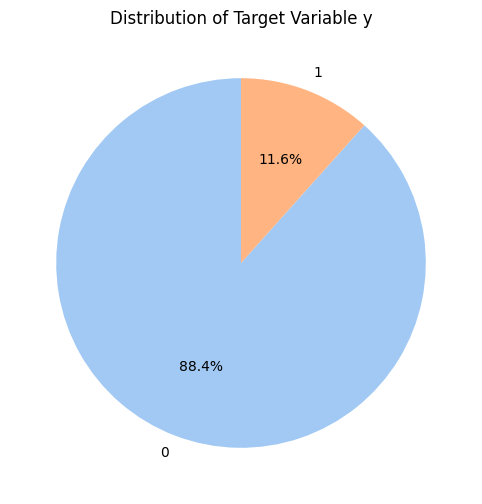

In [114]:
y_counts = y_train.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(y_counts, labels=y_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel", 2), startangle=90)
plt.title('Distribution of Target Variable y')
plt.show()

### Class Counts: Bar Plot

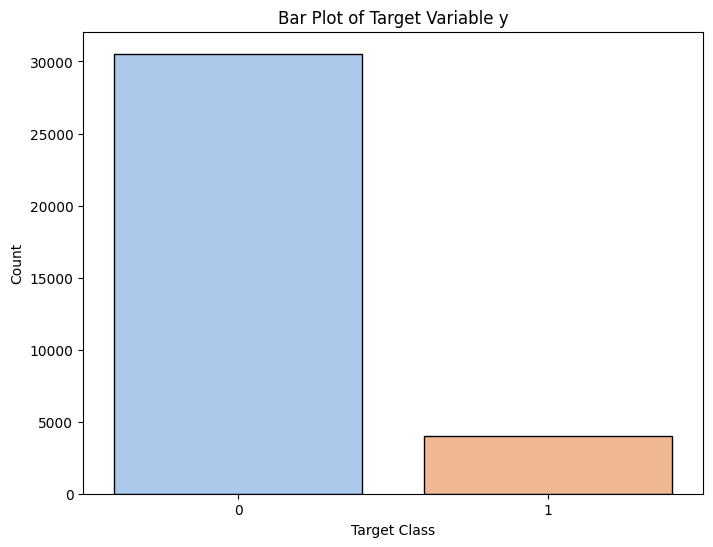

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette="pastel", edgecolor='black')
plt.title("Bar Plot of Target Variable y")
plt.xlabel("Target Class")
plt.ylabel("Count")
plt.show()

### Imbalance Ratio

In [120]:
class_0, class_1 = y_train.value_counts()

print(f"Imbalance Ratio: {round(class_0 / class_1, 2)}")

Imbalance Ratio: 7.6


## Features variables analysis

### Age

In [124]:
X_train['age'].unique()

array([55, 34, 40, 29, 51, 33, 41, 46, 32, 37, 57, 56, 48, 43, 45, 52, 27,
       24, 36, 31, 28, 80, 49, 39, 50, 35, 44, 25, 26, 38, 54, 30, 42, 95,
       47, 53, 21, 19, 22, 59, 75, 73, 77, 58, 69, 61, 60, 63, 66, 68, 64,
       74, 23, 79, 78, 20, 62, 87, 67, 70, 71, 65, 83, 72, 82, 94, 81, 89,
       76, 86, 85, 18, 84, 88, 90])

In [126]:
X_train['age'].value_counts()

age
32    1654
31    1544
33    1536
34    1515
35    1467
      ... 
89       3
95       2
88       2
90       2
94       1
Name: count, Length: 75, dtype: int64

In [128]:
X_train['age'].value_counts(normalize=True)

age
32    0.047867
31    0.044684
33    0.044452
34    0.043844
35    0.042455
        ...   
89    0.000087
95    0.000058
88    0.000058
90    0.000058
94    0.000029
Name: proportion, Length: 75, dtype: float64

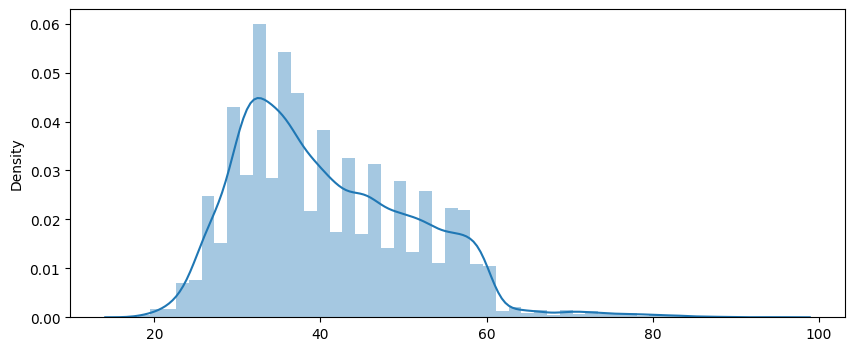

In [130]:
# plotting age
plt.figure(figsize=(10,4))
sns.distplot(x=X_train['age'])
plt.show()

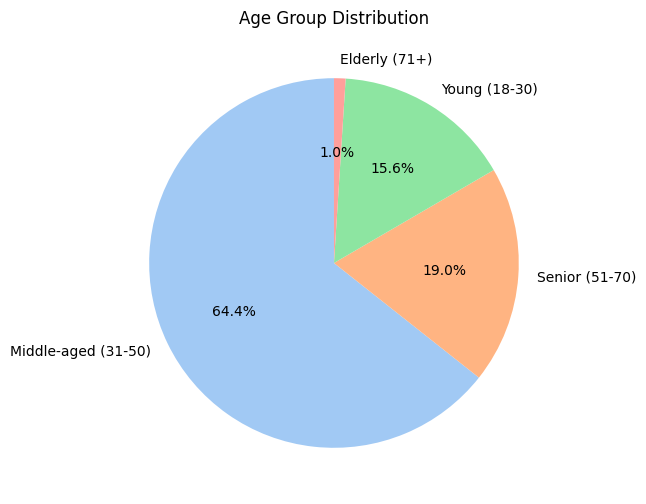

In [131]:
# defining age groups
age_bins = [18, 30, 50, 70, df['age'].max()]
age_labels = ['Young (18-30)', 'Middle-aged (31-50)', 'Senior (51-70)', 'Elderly (71+)']

# counting occurrences of each group
age_group_counts = pd.cut(X_train['age'], bins=age_bins, labels=age_labels).value_counts()

# plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("pastel", len(age_labels)), startangle=90)

plt.title('Age Group Distribution')
plt.show()

### Job

In [135]:
X_train['job'].unique()

array(['blue-collar', 'technician', 'admin.', 'services', 'management',
       'housemaid', 'retired', 'student', 'entrepreneur', 'unemployed',
       'self-employed'], dtype=object)

In [137]:
X_train['job'].value_counts()

job
blue-collar      7450
management       7390
technician       5891
admin.           4009
services         3165
retired          1713
self-employed    1240
entrepreneur     1109
unemployed       1011
housemaid         944
student           632
Name: count, dtype: int64

In [139]:
X_train['job'].value_counts(normalize=True)

job
blue-collar      0.215605
management       0.213868
technician       0.170487
admin.           0.116021
services         0.091596
retired          0.049575
self-employed    0.035886
entrepreneur     0.032095
unemployed       0.029259
housemaid        0.027320
student          0.018290
Name: proportion, dtype: float64

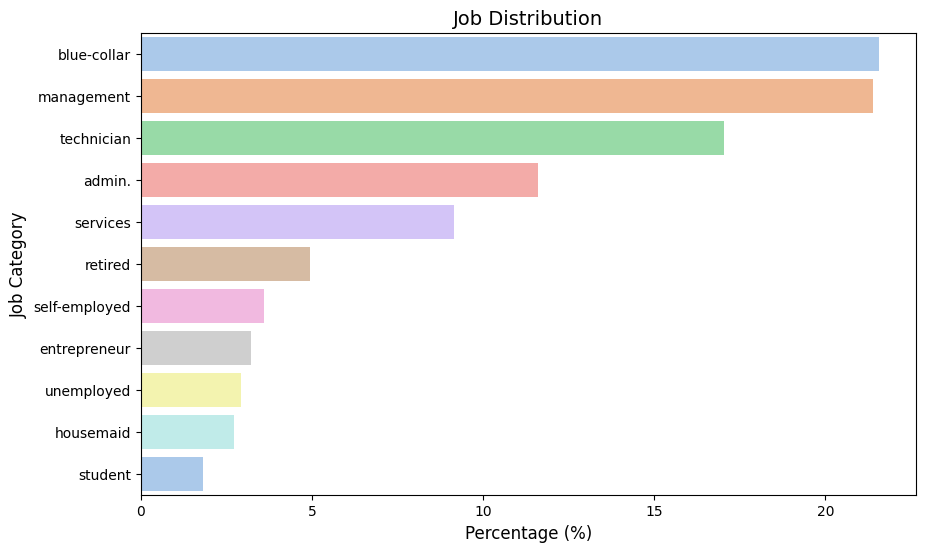

In [141]:
# percentage distribution for each job
job_counts = X_train['job'].value_counts(normalize=True) * 100

# plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.values, y=job_counts.index, palette="pastel")

# tittle & lables
plt.title('Job Distribution', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Job Category', fontsize=12)

plt.show()

### Marital

In [144]:
X_train['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [146]:
X_train['marital'].value_counts()

marital
married     20791
single       9730
divorced     4033
Name: count, dtype: int64

In [148]:
X_train['marital'].value_counts(normalize=True)

marital
married     0.601696
single      0.281588
divorced    0.116716
Name: proportion, dtype: float64

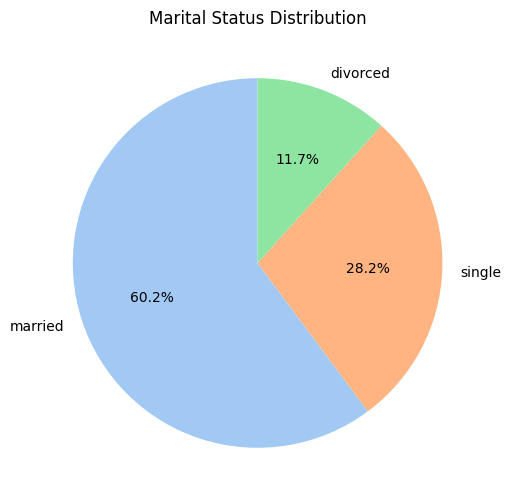

In [150]:
# counting occurrences of each group
marital_counts = X_train['marital'].value_counts()

# plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("pastel", len(marital_counts)), startangle=90)

plt.title('Marital Status Distribution')
plt.show()

### Education

In [153]:
X_train['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [155]:
X_train['education'].value_counts()

education
secondary    18482
tertiary     10621
primary       5451
Name: count, dtype: int64

In [157]:
X_train['education'].value_counts(normalize=True)

education
secondary    0.534873
tertiary     0.307374
primary      0.157753
Name: proportion, dtype: float64

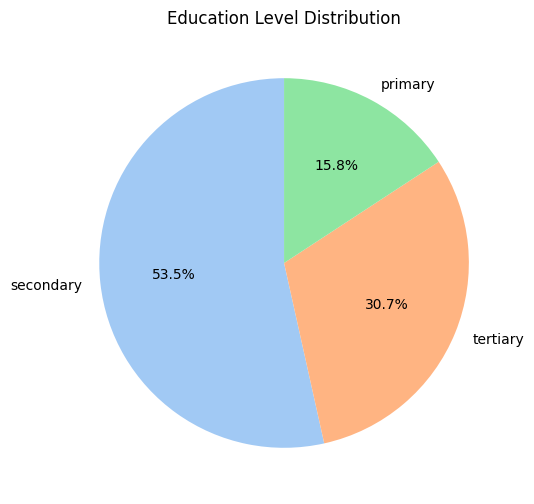

In [159]:
# counting occurrences of each group
education_counts = X_train['education'].value_counts()

# plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("pastel", len(education_counts)), startangle=90)

plt.title('Education Level Distribution')
plt.show()

### Contact

In [162]:
X_train['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [164]:
X_train['contact'].value_counts()

contact
cellular     22663
unknown       9771
telephone     2120
Name: count, dtype: int64

In [166]:
X_train['contact'].value_counts(normalize=True)

contact
cellular     0.655872
unknown      0.282775
telephone    0.061353
Name: proportion, dtype: float64

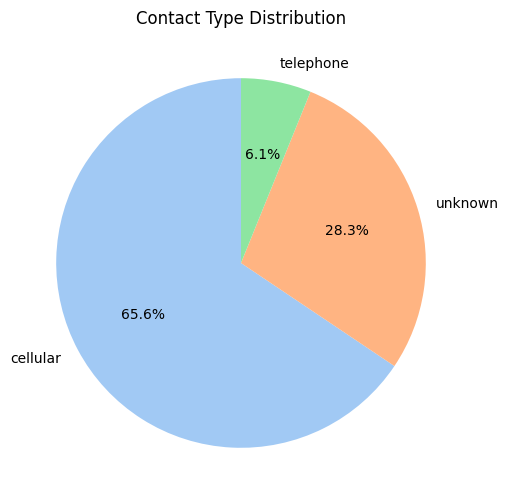

In [168]:
# counting occurrences of each group
contact_counts = X_train['contact'].value_counts()

# plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("pastel", len(contact_counts)), startangle=90)

plt.title('Contact Type Distribution')
plt.show()

### Poutcome

In [171]:
X_train['poutcome'].unique()

array(['other', 'failure', 'success'], dtype=object)

In [173]:
X_train['poutcome'].value_counts()

poutcome
other      29594
failure     3816
success     1144
Name: count, dtype: int64

In [175]:
X_train['poutcome'].value_counts(normalize=True)

poutcome
other      0.856457
failure    0.110436
success    0.033108
Name: proportion, dtype: float64

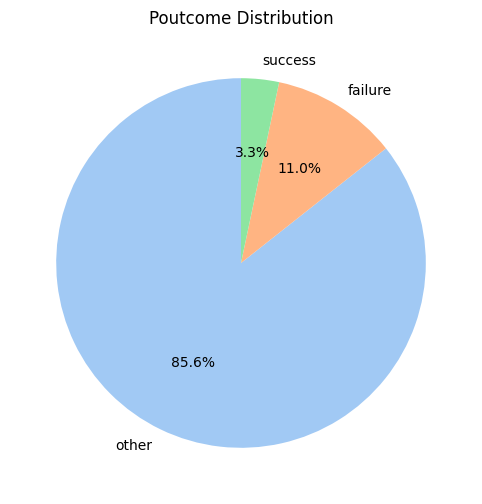

In [177]:
# counting occurrences of each group
contact_counts = X_train['poutcome'].value_counts()

# plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(contact_counts, labels=contact_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("pastel", len(contact_counts)), startangle=90)

plt.title('Poutcome Distribution')
plt.show()

### Default

In [180]:
X_train['default'].unique()

array([0, 1])

In [182]:
X_train['default'].value_counts()

default
0    33931
1      623
Name: count, dtype: int64

In [184]:
X_train['default'].value_counts(normalize=True)

default
0    0.98197
1    0.01803
Name: proportion, dtype: float64

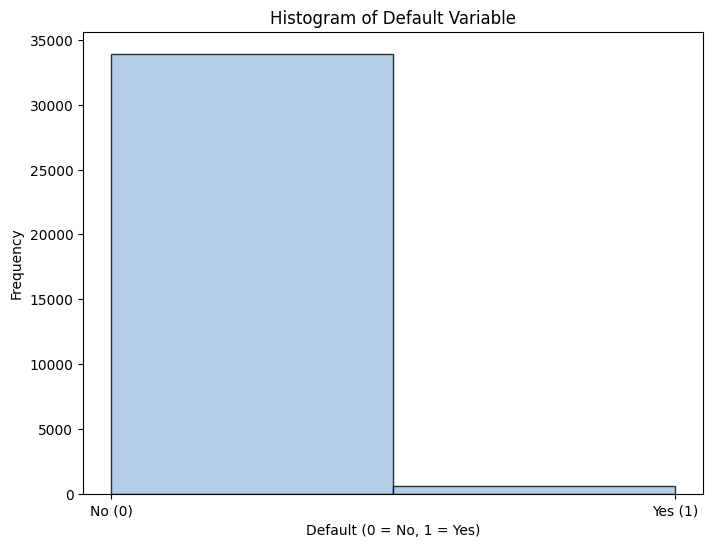

In [186]:
# plotting an histogram for the 'default' variable
plt.figure(figsize=(8, 6))
plt.hist(X_train['default'], bins=2, color='#A3C1E1', edgecolor='black', alpha=0.8)

# tittle & lables
plt.xticks([0, 1], labels=['No (0)', 'Yes (1)'])
plt.title("Histogram of Default Variable")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Frequency")

plt.show()

### Housing

In [189]:
X_train['housing'].unique()

array([0, 1])

In [191]:
X_train['housing'].value_counts()

housing
1    19401
0    15153
Name: count, dtype: int64

In [193]:
X_train['housing'].value_counts(normalize=True)

housing
1    0.561469
0    0.438531
Name: proportion, dtype: float64

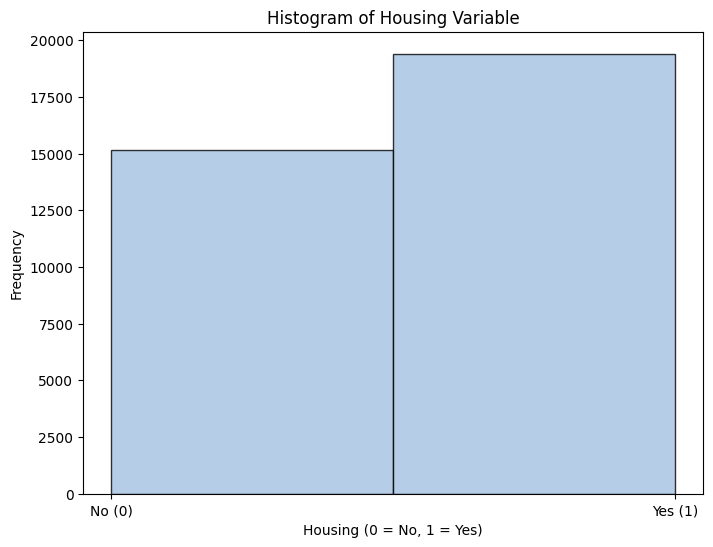

In [195]:
# plotting an histogram for the 'housing' variable
plt.figure(figsize=(8, 6))
plt.hist(X_train['housing'], bins=2, color='#A3C1E1', edgecolor='black', alpha=0.8)

# tittle & lables
plt.xticks([0, 1], labels=['No (0)', 'Yes (1)'])
plt.title("Histogram of Housing Variable")
plt.xlabel("Housing (0 = No, 1 = Yes)")
plt.ylabel("Frequency")

plt.show()

### Loan

In [198]:
X_train['loan'].unique()

array([0, 1])

In [200]:
X_train['loan'].value_counts()

loan
0    28869
1     5685
Name: count, dtype: int64

In [202]:
X_train['loan'].value_counts(normalize=True)

loan
0    0.835475
1    0.164525
Name: proportion, dtype: float64

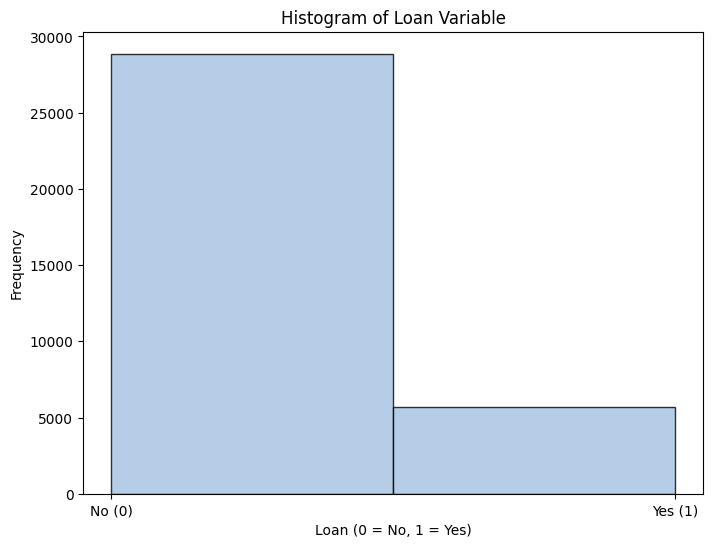

In [204]:
# plotting an histogram for the 'loan' variable
plt.figure(figsize=(8, 6))
plt.hist(X_train['loan'], bins=2, color='#A3C1E1', edgecolor='black', alpha=0.8)

# tittle & lables
plt.xticks([0, 1], labels=['No (0)', 'Yes (1)'])
plt.title("Histogram of Loan Variable")
plt.xlabel("Loan (0 = No, 1 = Yes)")
plt.ylabel("Frequency")

plt.show()

### Duration

In [207]:
X_train['duration'].unique()

array([  78,  105,  257, ..., 1162, 1404, 1145])

In [209]:
X_train['duration'].value_counts()

duration
103     142
89      138
122     137
111     136
104     136
       ... 
2653      1
1266      1
1393      1
1916      1
1145      1
Name: count, Length: 1481, dtype: int64

In [211]:
X_train['duration'].value_counts(normalize=True)

duration
103     0.004110
89      0.003994
122     0.003965
111     0.003936
104     0.003936
          ...   
2653    0.000029
1266    0.000029
1393    0.000029
1916    0.000029
1145    0.000029
Name: proportion, Length: 1481, dtype: float64

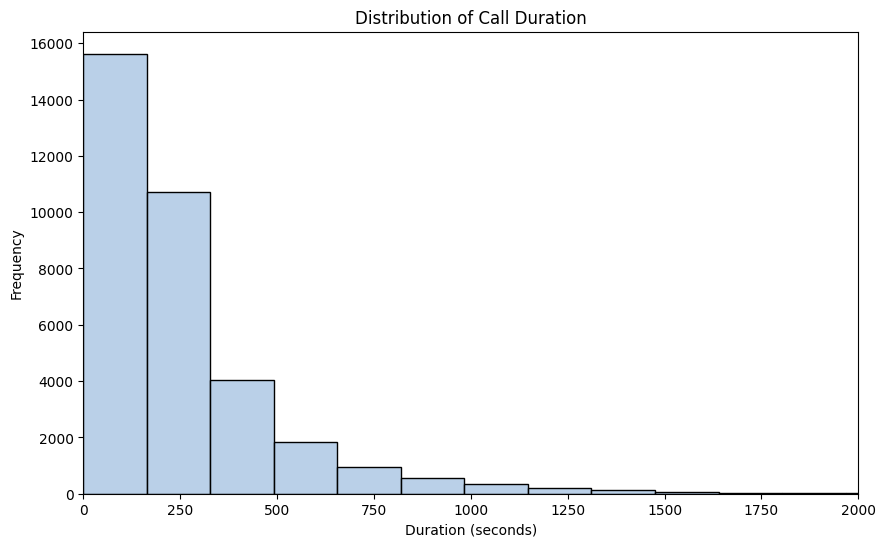

In [213]:
# plotting an histogram for the 'duration' variable
plt.figure(figsize=(10, 6))
sns.histplot(X_train['duration'], bins=30, kde=False, color='#A3C1E1', edgecolor='black')

# tittle & lables
plt.title("Distribution of Call Duration")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")

plt.xlim(0, 2000)
plt.show()

### Previous

In [215]:
X_train['pdays'].describe()

count    34554.000000
mean        40.818140
std        100.881877
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

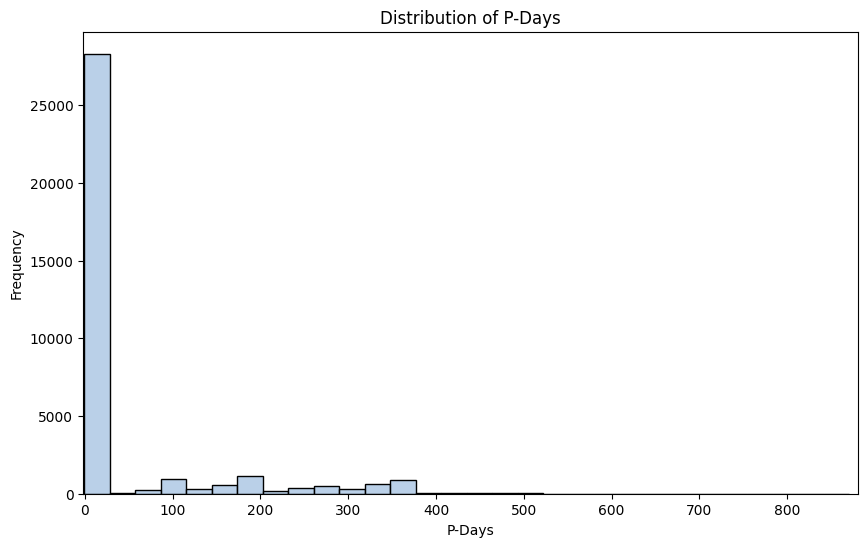

In [218]:
# plotting an histogram for p-days
plt.figure(figsize=(10, 6))
sns.histplot(X_train['pdays'], bins=30, kde=False, color='#A3C1E1', edgecolor='black')

# tittle & lables
plt.title("Distribution of P-Days")
plt.xlabel("P-Days")
plt.ylabel("Frequency")

plt.xlim(-2, X_train['pdays'].max() + 10)
plt.show()

## Statistical Feature Analysis

### Chi-Square Test

In [222]:
# list categorical variables
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Chi-Square test
for column in categorical_columns:
    crosstab = pd.crosstab(X_train[column], y_train)
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-Square Test for {column}: p-value = {p}")

Chi-Square Test for job: p-value = 1.6546665168215592e-131
Chi-Square Test for marital: p-value = 2.758137748847709e-32
Chi-Square Test for education: p-value = 2.0971565815701392e-41
Chi-Square Test for contact: p-value = 1.6589126440942436e-170
Chi-Square Test for poutcome: p-value = 0.0
Chi-Square Test for contact_date: p-value = 0.0


All categorical variables have very small p-values, meaning they have a strong statistical relationship with the target variable (`y`). None of these variables should be removed.

## Point-Biserial Correlation

In [226]:
# list of numerical variables
numerical_columns = X_train.select_dtypes(include=['int', 'float']).columns

# point-biserial correlation
for column in numerical_columns:
    correlation, p_value = pointbiserialr(X_train[column], y_train)
    print(f"Correlation between {column} and y: {correlation}, p-value: {p_value}")

Correlation between age and y: 0.021207825713697028, p-value: 8.06160761157204e-05
Correlation between default and y: -0.02946705829058526, p-value: 4.288585692053803e-08
Correlation between balance and y: 0.05657890069042972, p-value: 6.602515782030146e-26
Correlation between housing and y: -0.1374554325449211, p-value: 2.38976284092766e-145
Correlation between loan and y: -0.06840702049202774, p-value: 4.006083579661989e-37
Correlation between duration and y: 0.4009234756221592, p-value: 0.0
Correlation between campaign and y: -0.07198753481196986, p-value: 6.173741138256344e-41
Correlation between pdays and y: 0.1032294113837604, p-value: 1.720880301584568e-82
Correlation between previous and y: 0.08875314836858433, p-value: 2.2280045339462702e-61


Most numerical variables show weak correlations with the target (`y`), but their p-values are significant. However:
- **Default** and **Campaign** have very weak correlations, suggesting they may not contribute much to predictions and could be removed.
- Other numerical variables, like **Duration** and **Pdays**, show stronger relationships and should be kept.

## Combined Visualizations

### Pairplot (for numerical feature relationships)

These pairplots visually show how all numerical features in the dataset relate to each other, while also highlighting the target variable (`y`). The colors represent the target classes (`0` and `1`), helping us spot patterns, relationships, and how well the features separate the two classes.

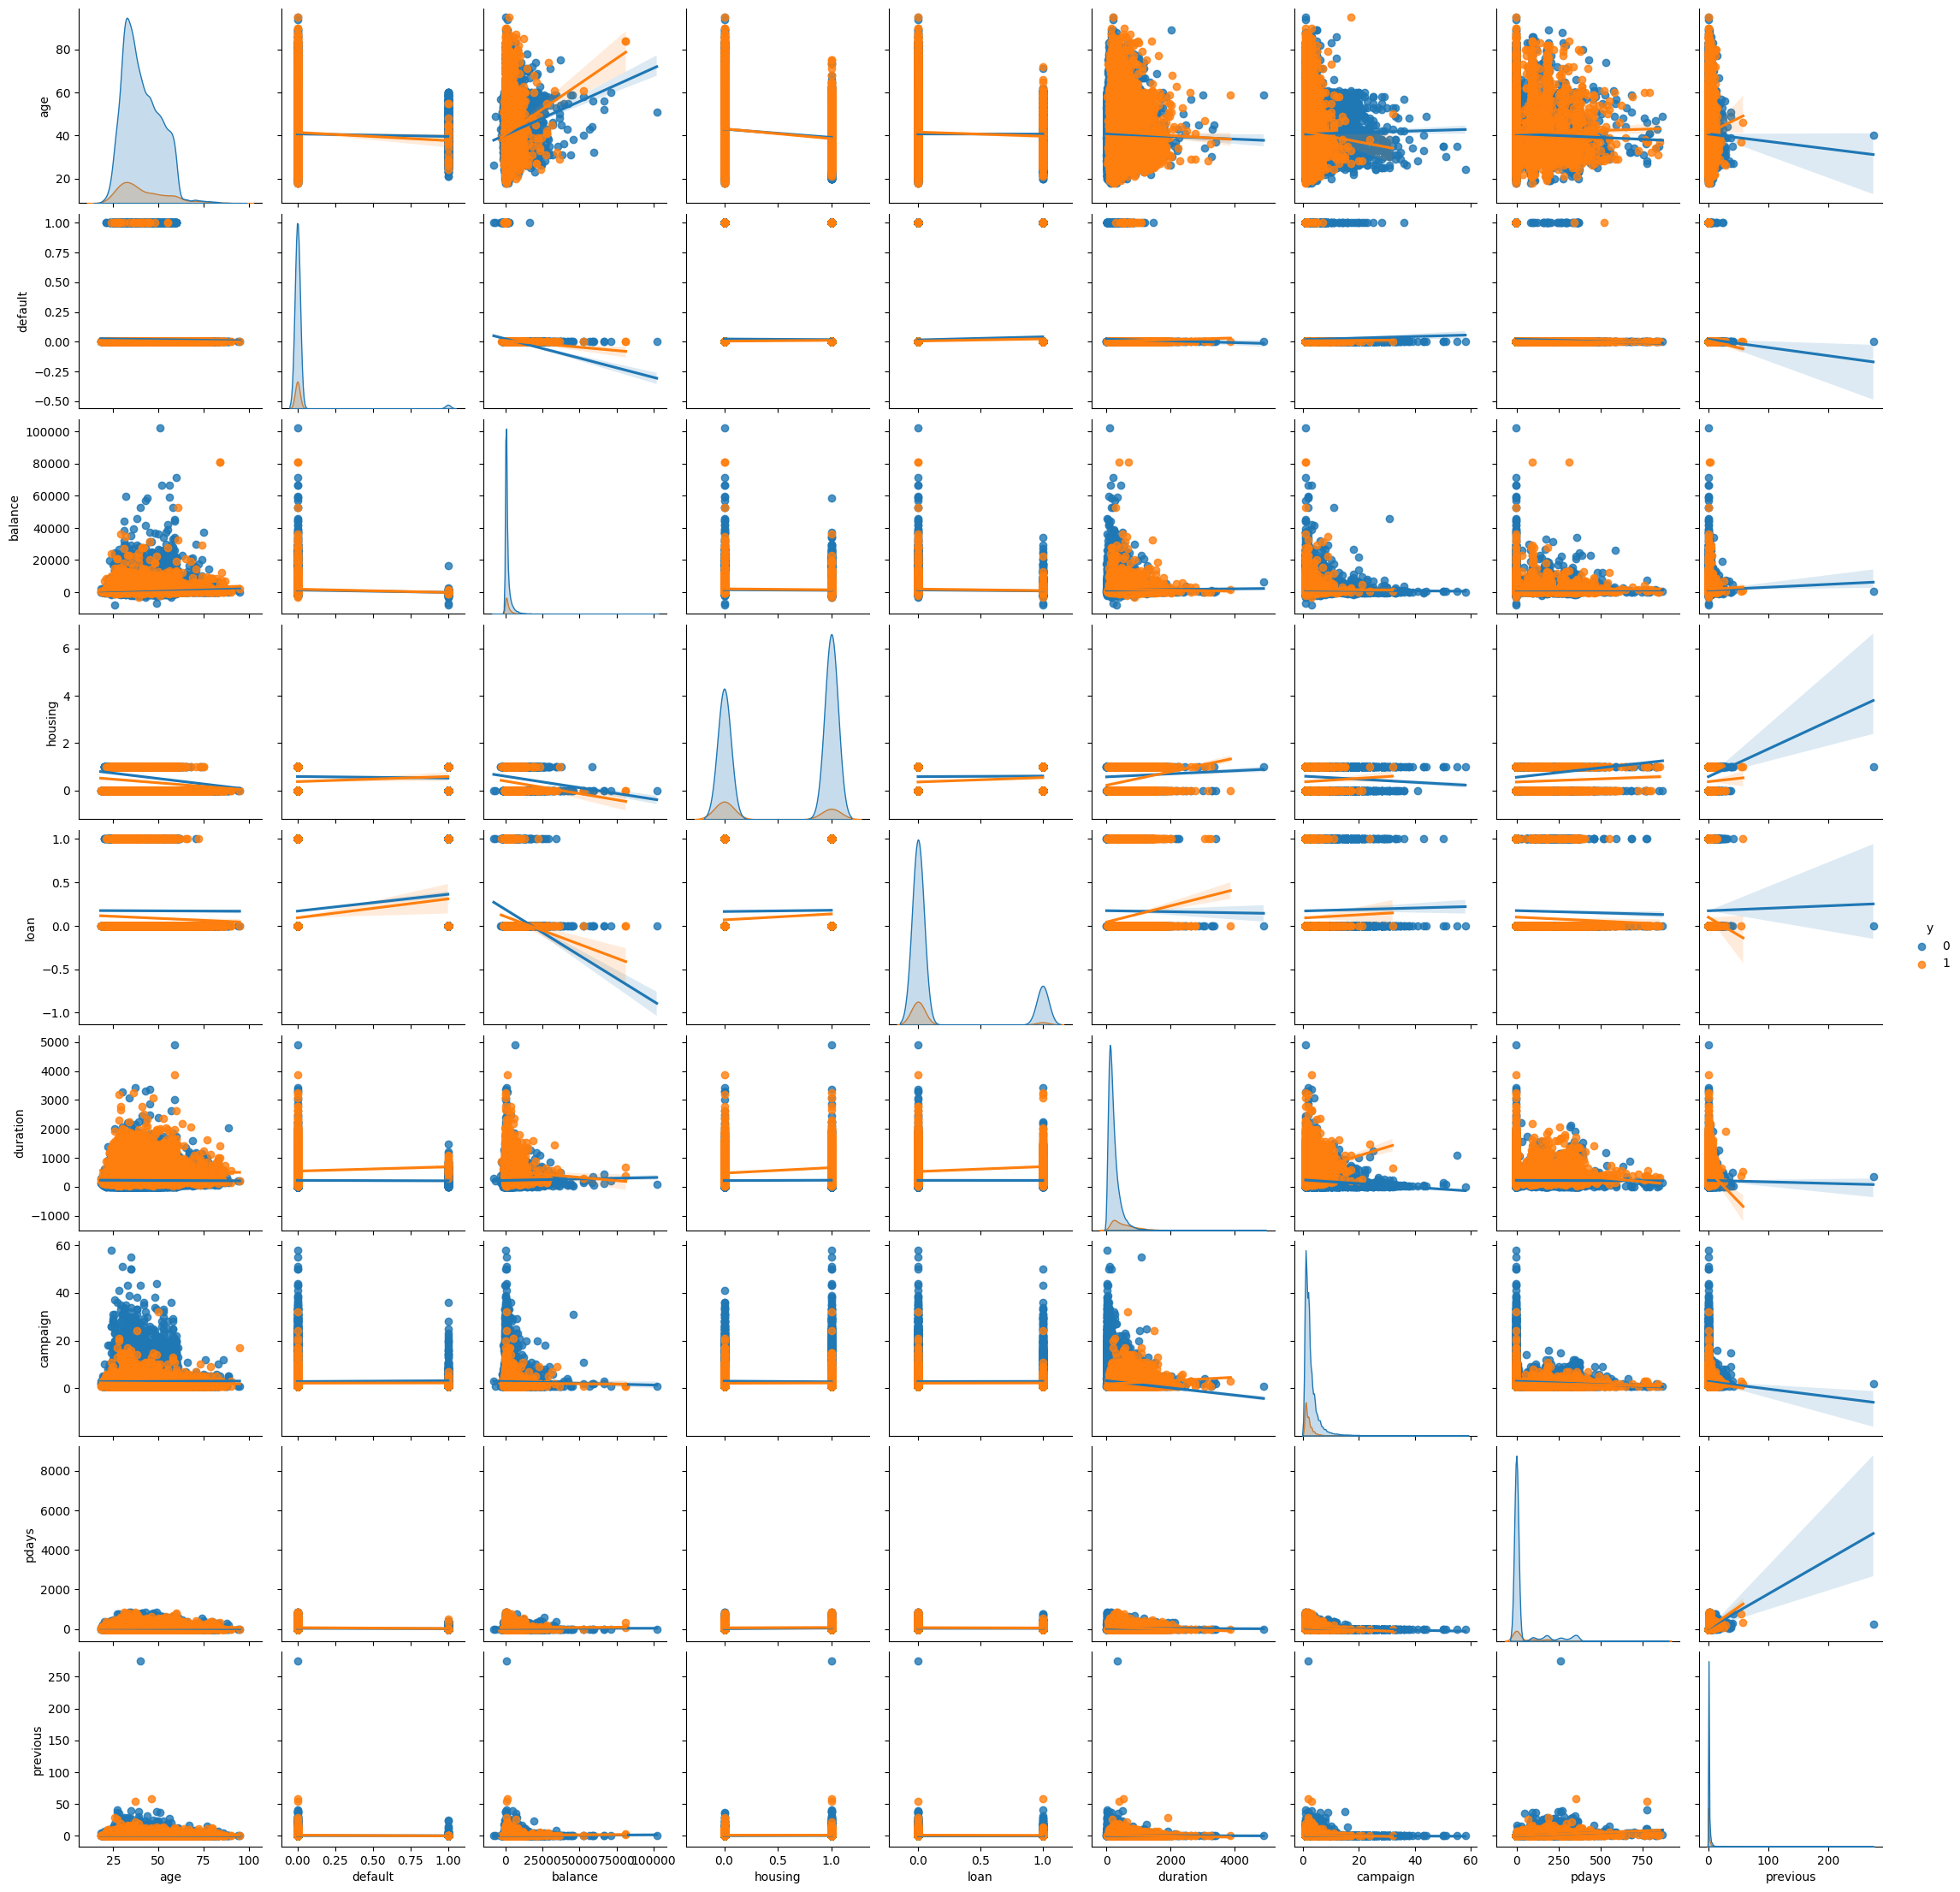

In [232]:
# combine X_train and y_train into a single DataFrame for plotting
data_train = X_train.copy()
data_train['y'] = y_train

# select only numeric columns for pairplot
data_numeric = data_train.select_dtypes(include=["int", "float"])

# create pairplot with 'y' as the hue
sns.pairplot(data=data_numeric, kind='reg', hue='y')
plt.show()

- **Class Separation:** Features like `duration` show clear differences between target classes (`0` and `1`), making them important for predictions.
- **Correlations:** Some features, like `balance` and `duration`, show relationships that could be useful for modeling.
- **Imbalance:** The orange (`1`) class is much smaller than the blue (`0`) class, confirming the dataset imbalance.
- **Outliers:** Features like `previous` and `pdays` have extreme values that might affect the model.
- **Feature Insights:** Features like `housing` and `loan` are grouped, while others like `age` are spread out.

### Histograms (for numerical features)

These histograms show the distribution of numeric features, highlighting their range, patterns, and potential outliers. The smooth curves help visualize data density.

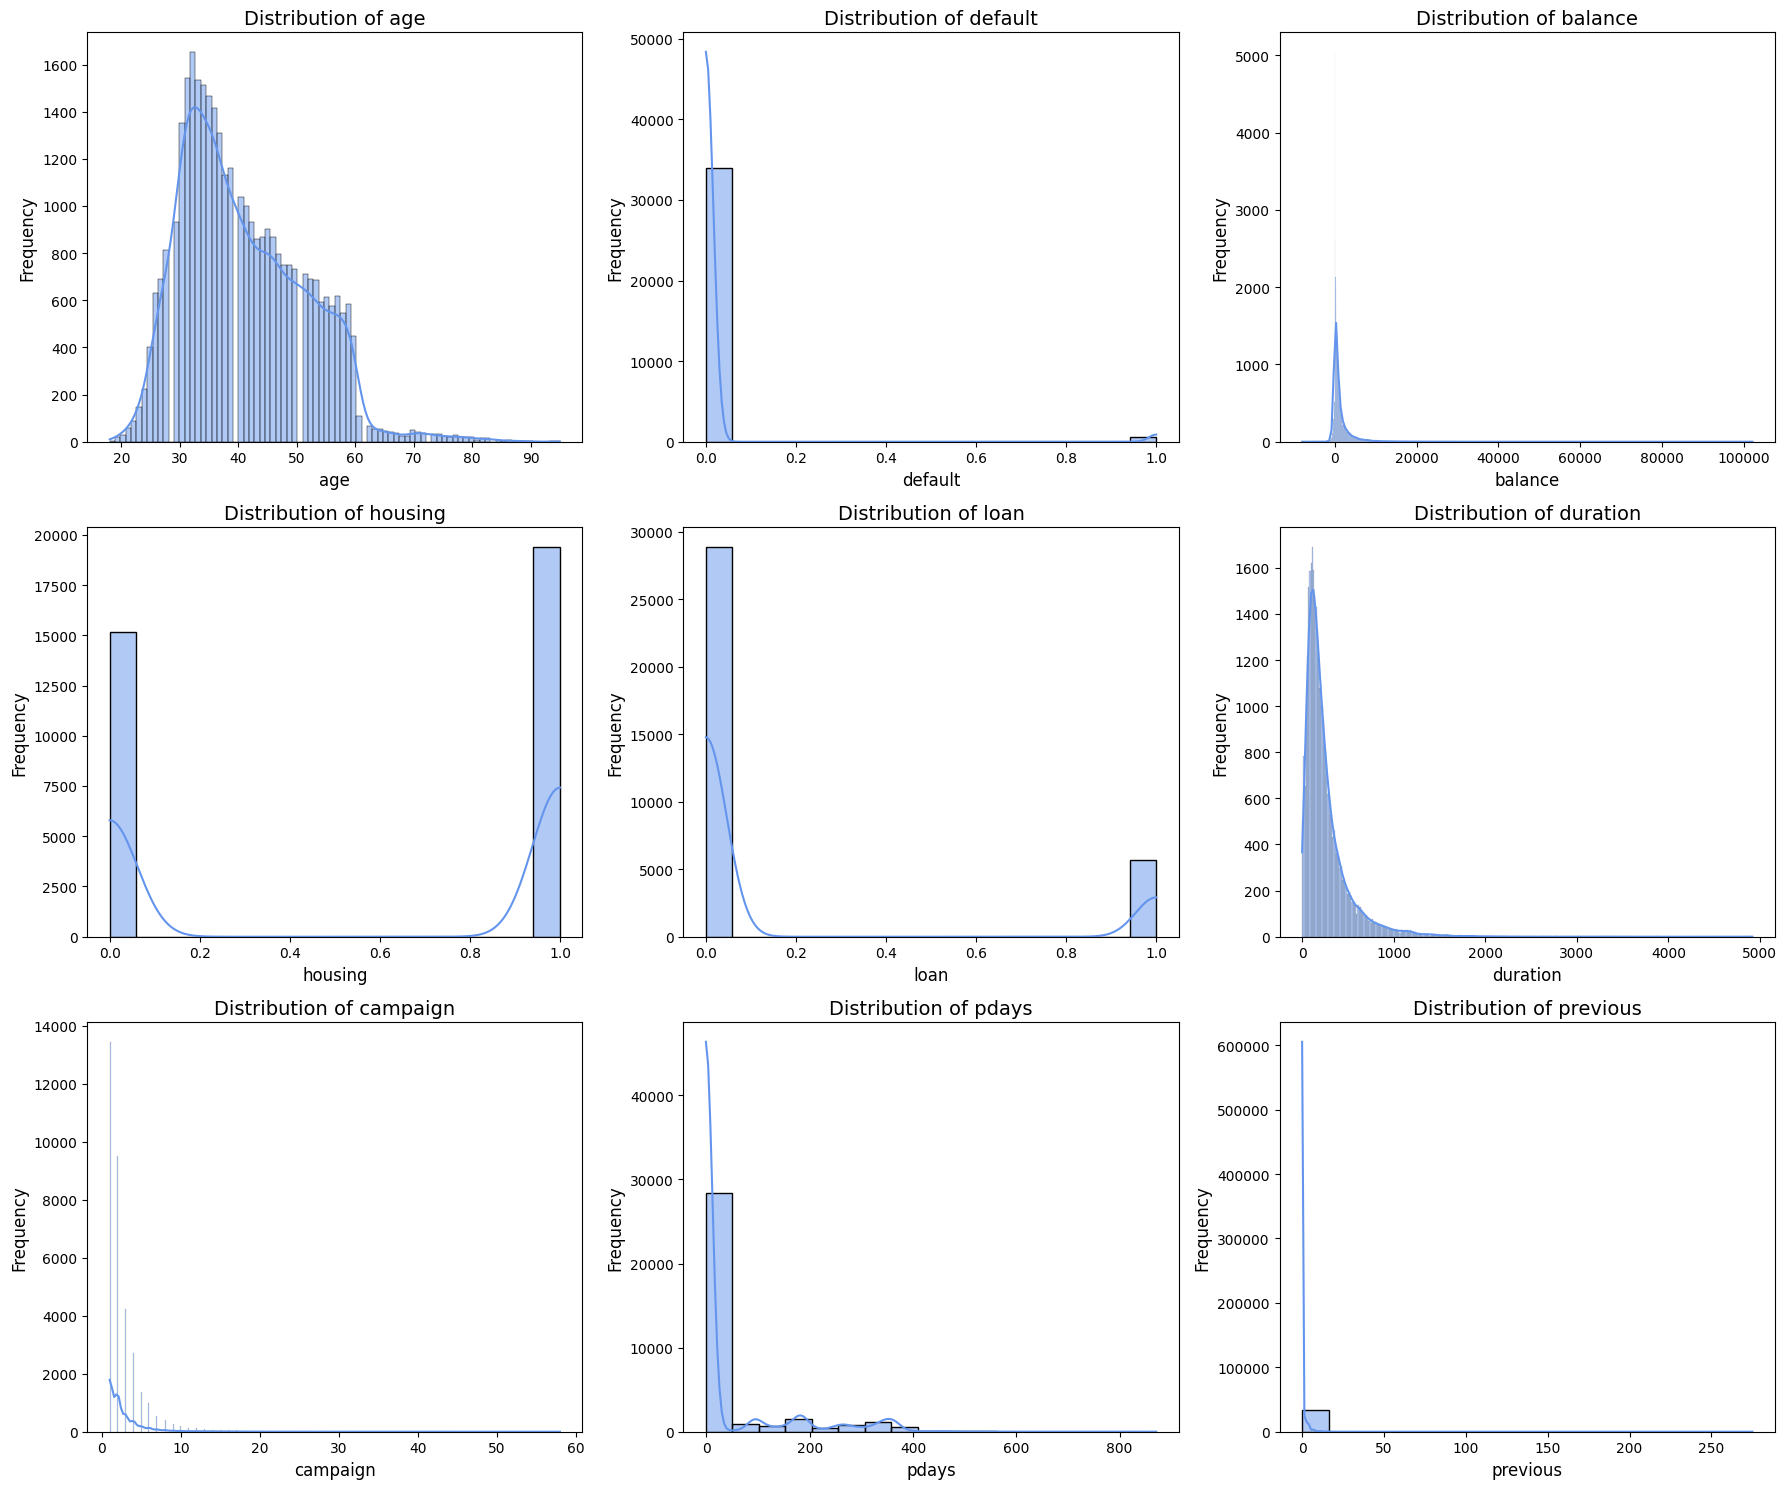

In [236]:
# select only numeric features
numeric_features = X_train.select_dtypes(include=["int", "float"]).columns

# create a grid of histograms
fig, axs = plt.subplots(3, 3, figsize=(18, 15)) 
axs = axs.flatten()

# plotting each feature in a separate subplot
for i, feature in enumerate(numeric_features):
    sns.histplot(X_train[feature], kde=True, color='cornflowerblue', ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}', fontsize=14)
    axs[i].set_xlabel(feature, fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)

# to remove empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

- **Age**: Right-skewed, with most individuals concentrated between 30 and 50 years.
- **Default, Housing, Loan**: Binary variables with clear splits between 0 and 1.
- **Balance, Duration, Campaign, Pdays, Previous**: Highly skewed distributions, with most values concentrated near zero, indicating outliers or rare cases for higher values.

### Box-plots

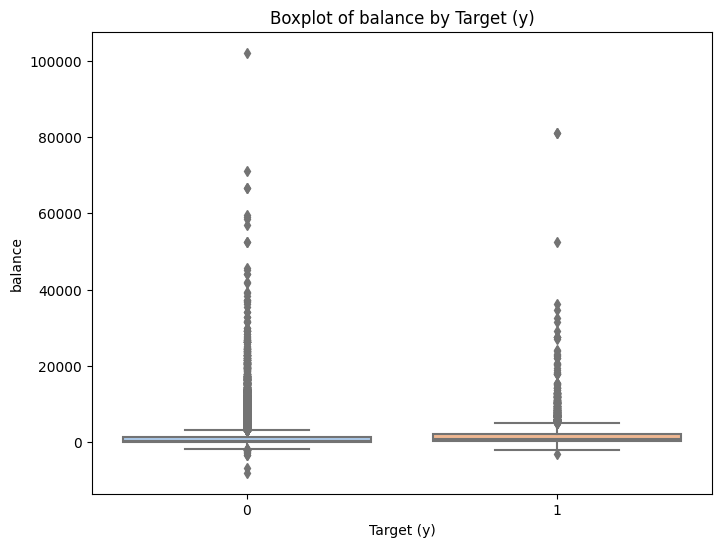

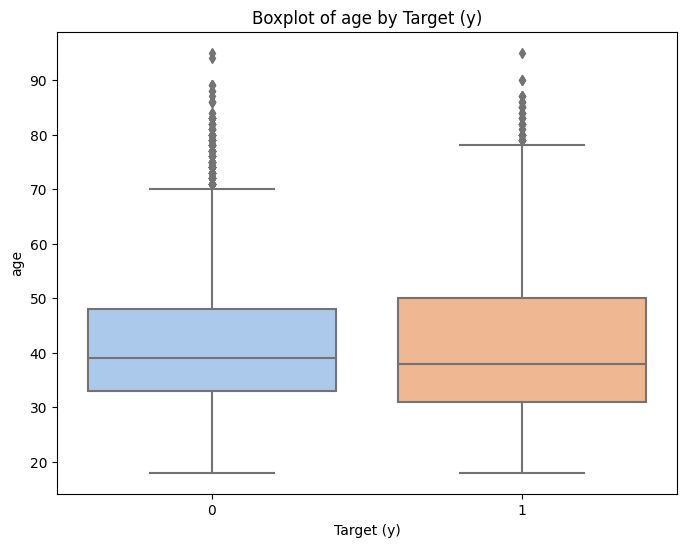

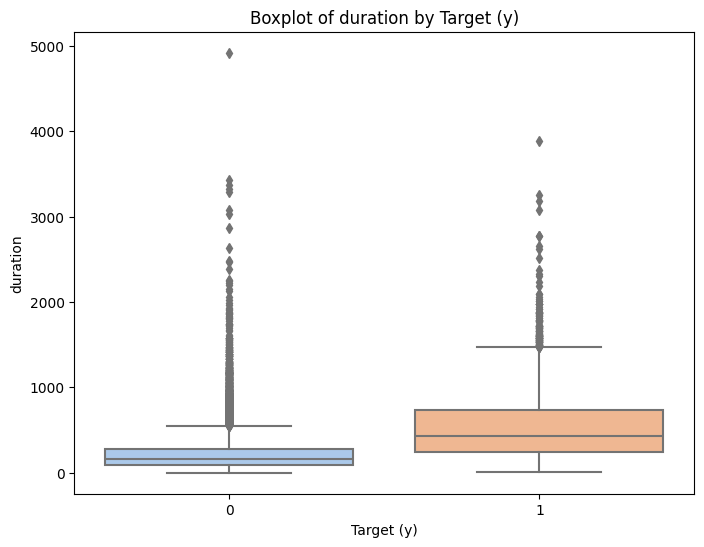

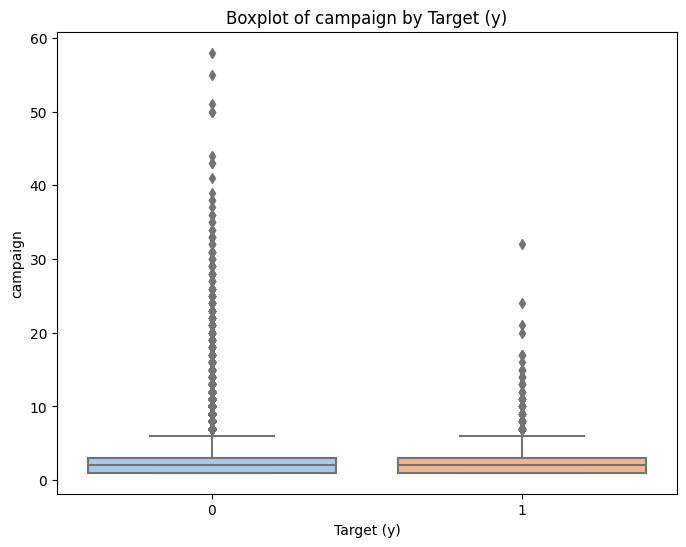

In [239]:
# list of features
features = ['balance', 'age', 'duration', 'campaign']

# loop through each feature to create a boxplot
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='y', y=feature, data=data_train, palette="pastel")
    plt.title(f"Boxplot of {feature} by Target (y)")
    plt.xlabel("Target (y)")
    plt.ylabel(feature)
    plt.show()

The boxplots show that `duration` is higher for `y=1`, meaning longer calls lead to better outcomes. `Campaign` has similar medians for both classes, with no clear pattern in outliers. `Balance` is slightly higher for `y=1`, but most values are low for both. `Age` overlaps a lot, showing little difference between outcomes. `Duration` stands out as the most useful feature.


### Correlation plot

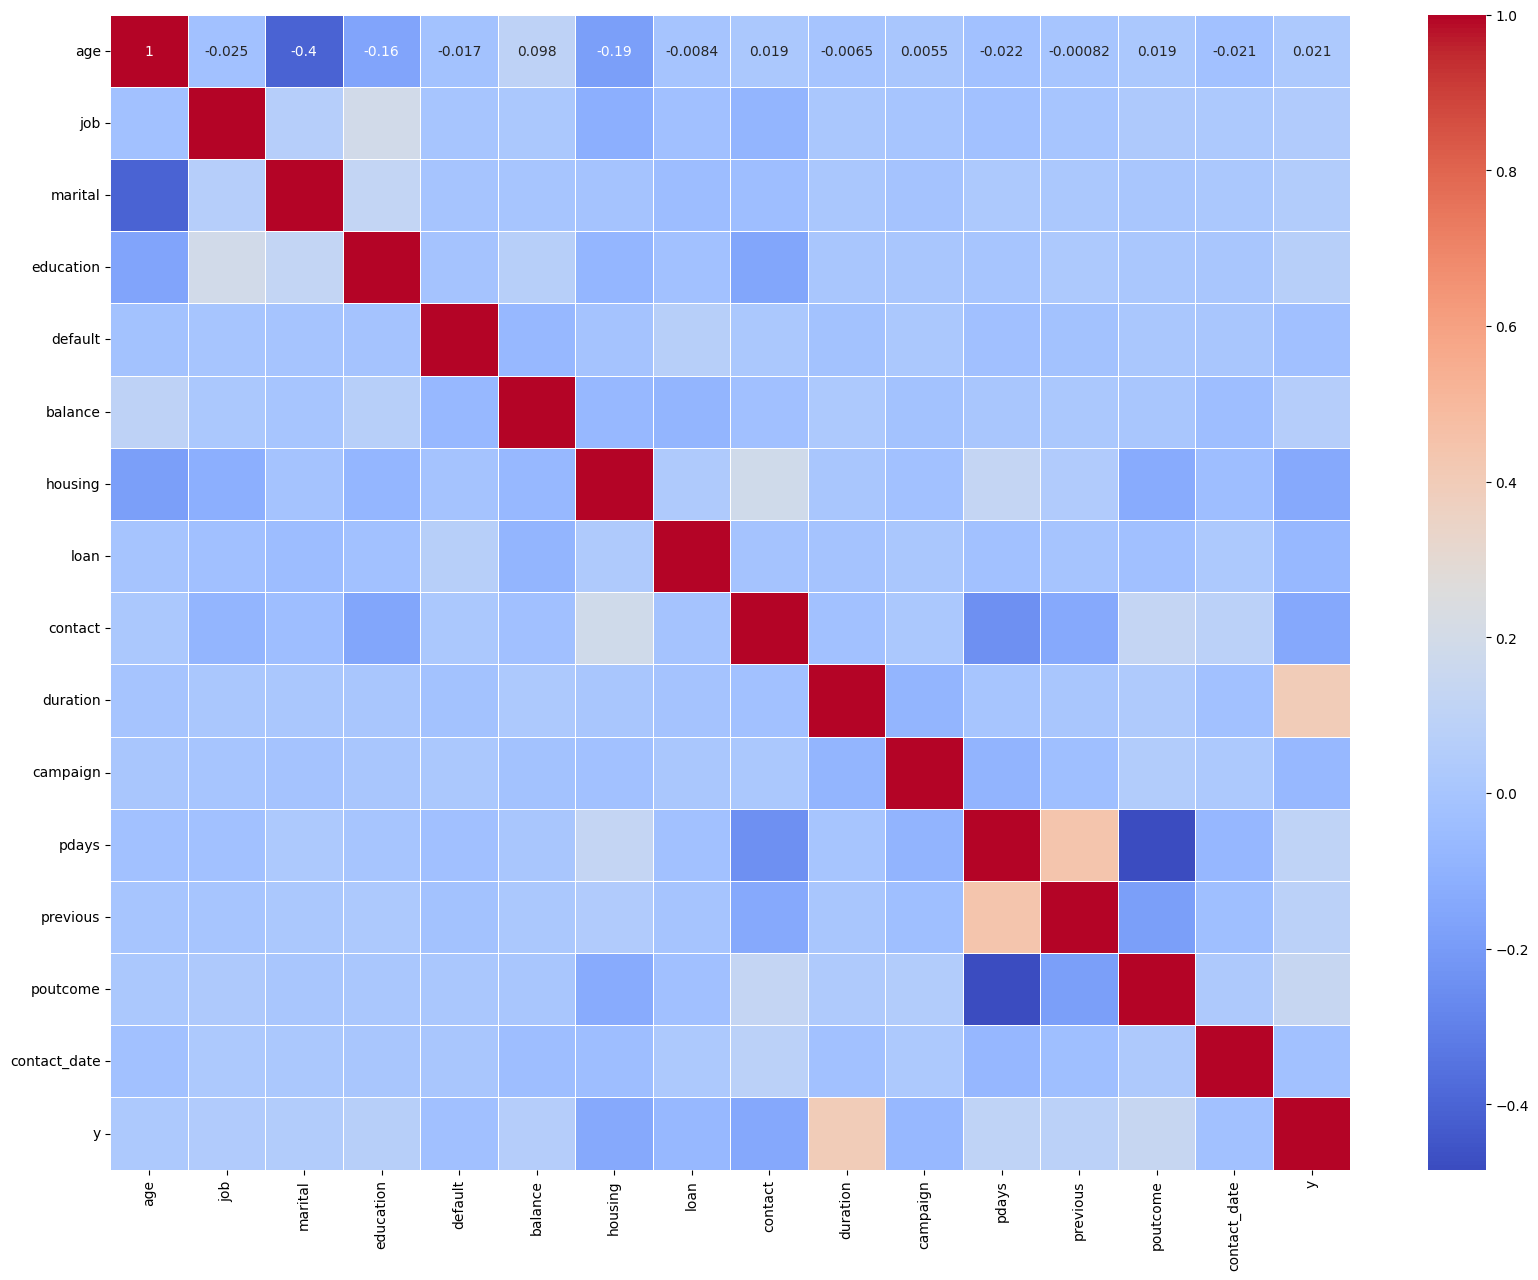

In [242]:
# for the purpose of plotting the correlation heatmap
# for all features, lets encode categorical features

data_train = X_train.copy()
data_train['y'] = y_train

categorical_columns = X_train.select_dtypes(include=["object"]).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_train[col] = le.fit_transform(data_train[col])
    label_encoders[col] = le

plt.figure(figsize=(20,15))
sns.heatmap(data_train.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

The heatmap shows that `duration` is the most correlated with the target (`y`), while `pdays` and `previous` are highly correlated with each other. Most other features show weak or no correlation, indicating small linear relationships.

## Final Decision

Based on the visualizations and statistical tests, we have decided to remove **Default**, **Balance** and **Campaign** as they show weak relationships with the target variable (`y`) and are unlikely to contribute meaningfully to the model's predictions.


In [245]:
X_train= X_train.drop(columns=['balance','default','campaign'])
X_test= X_test.drop(columns=['balance','default','campaign'])

In [246]:
X_train.head()

,age,job,marital,education,housing,loan,contact,duration,pdays,previous,poutcome,contact_date
39829,55,blue-collar,married,secondary,0,0,cellular,78,-1,0,other,1-jun
29311,34,technician,married,secondary,1,0,cellular,105,263,1,failure,2-feb
7168,40,admin.,married,secondary,1,1,unknown,257,-1,0,other,29-may
3756,29,services,single,secondary,1,0,unknown,140,-1,0,other,16-may
24946,51,technician,divorced,secondary,1,0,cellular,193,-1,0,other,18-nov


In [247]:
X_test.head()

,age,job,marital,education,housing,loan,contact,duration,pdays,previous,poutcome,contact_date
40734,23,student,single,secondary,0,0,cellular,217,99,7,success,7-aug
34255,28,admin.,single,secondary,1,0,cellular,92,-1,0,other,4-may
16488,32,admin.,single,secondary,1,0,cellular,110,-1,0,other,23-jul
19470,45,blue-collar,married,secondary,1,1,cellular,235,-1,0,other,7-aug
25737,53,management,married,tertiary,1,0,cellular,137,-1,0,other,19-nov


In [248]:
print(X_train.shape, X_test.shape)

(34554, 12) (8639, 12)


In [249]:
y_train.head()

39829    0
29311    0
7168     0
3756     0
24946    0
Name: y, dtype: int64

In [250]:
y_test.head()

40734    1
34255    0
16488    0
19470    0
25737    0
Name: y, dtype: int64

In [251]:
print(y_train.shape, y_test.shape)

(34554,) (8639,)


In [252]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Datasets successfully exported as CSV files.")

Datasets successfully exported as CSV files.
